# Module 3 Assignment - Cleaning “Messy” Data

#### Group Member: Jinming Chen, Shichao Zhou

In [2]:
#load all the libraries that are needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# start by reading a set of sample data from github. This data set contains information related to automobile.
df = pd.read_csv("https://raw.githubusercontent.com/sczhou0705/DAV-6150-2/main/M3_Data%20(1).csv")
df.head()

,Unnamed: 0,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0,1,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,6,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [4]:
data= df.drop(columns=['Unnamed: 0'])


In [5]:
#describe the dataset
data.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,8.063251,0.641086,0.686315,23.367809,0.222559,106.679042,204.319120,0.994203,3.207628,0.846668,10.523778,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,4.996119,0.555614,0.606005,24.945667,0.234288,108.102694,163.116881,0.026538,0.679687,0.655612,3.629154,0.891089,1.323926,0.902540
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888090,0.480000,0.000000,0.000000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.600000,0.250000,0.280000,3.600000,0.046000,28.000000,100.000000,0.987720,2.960000,0.430000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,7.000000,0.410000,0.440000,12.900000,0.098000,56.000000,154.000000,0.994490,3.200000,0.590000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.800000,0.910000,0.970000,38.700000,0.368000,172.000000,262.000000,1.000515,3.470000,1.100000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


In [5]:
data.nunique()

INDEX                 12795
TARGET                    9
FixedAcidity            313
VolatileAcidity         510
CitricAcid              347
ResidualSugar          1342
Chlorides               996
FreeSulfurDioxide       617
TotalSulfurDioxide      858
Density                5933
pH                      497
Sulphates               382
Alcohol                 361
LabelAppeal               5
AcidIndex                14
STARS                     4
dtype: int64

In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12179 non-null  float64
 6   Chlorides           12157 non-null  float64
 7   FreeSulfurDioxide   12148 non-null  float64
 8   TotalSulfurDioxide  12113 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12400 non-null  float64
 11  Sulphates           11585 non-null  float64
 12  Alcohol             12142 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               9436 non-null   float64
dtypes: f

In [7]:
data.isnull().sum()/(len(data))*100

INDEX                  0.000000
TARGET                 0.000000
FixedAcidity           0.000000
VolatileAcidity        0.000000
CitricAcid             0.000000
ResidualSugar          4.814381
Chlorides              4.986323
FreeSulfurDioxide      5.056663
TotalSulfurDioxide     5.330207
Density                0.000000
pH                     3.087143
Sulphates              9.456819
Alcohol                5.103556
LabelAppeal            0.000000
AcidIndex              0.000000
STARS                 26.252442
dtype: float64

# Exploratory Data Analysis (EDA)

### Histograms

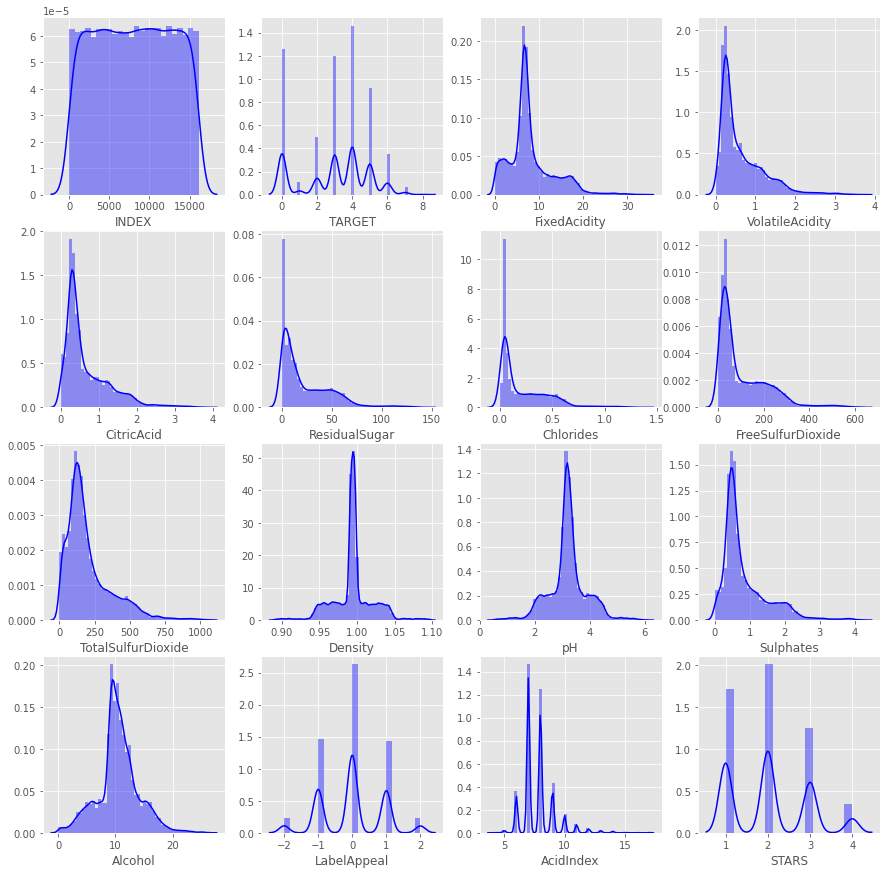

In [10]:
#show the distribution of all variables by using "for loop" 
i=0
numerical_columns = data.columns
for col in numerical_columns:
    i+=1
    plt.subplot(4,4,i)
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = (15,15)
    sns.distplot(data[col], color = 'blue')

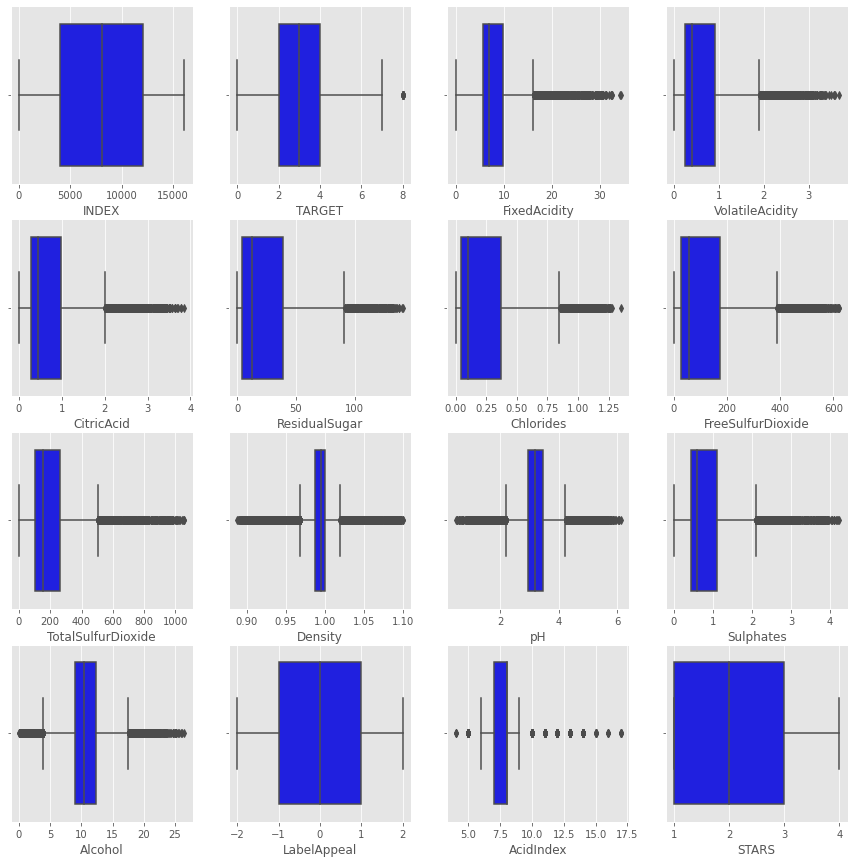

In [11]:
#show the distribution of all variables by using "for loop" 
i=0
numerical_columns = data.columns
for col in numerical_columns:
    i+=1
    plt.subplot(4,4,i)
    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = (15,15)
    sns.boxplot(data[col], color = 'blue')

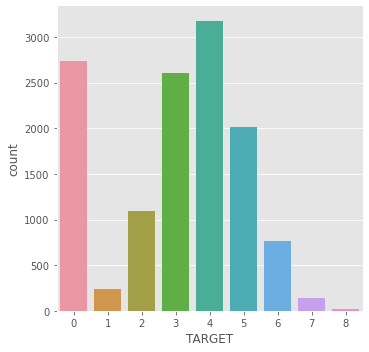

In [10]:
# 
sns.catplot(x='TARGET',data=data,kind='count')

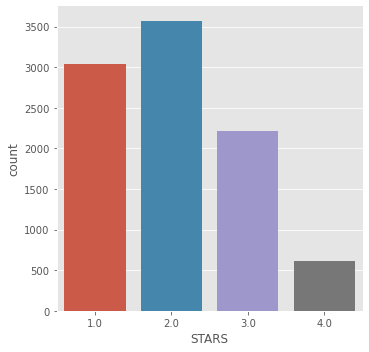

In [11]:
#Wine rating as determined by experts (4 = excellent; 1 = Poor)
sns.catplot(x='STARS',data=data,kind='count')

### Heatmap

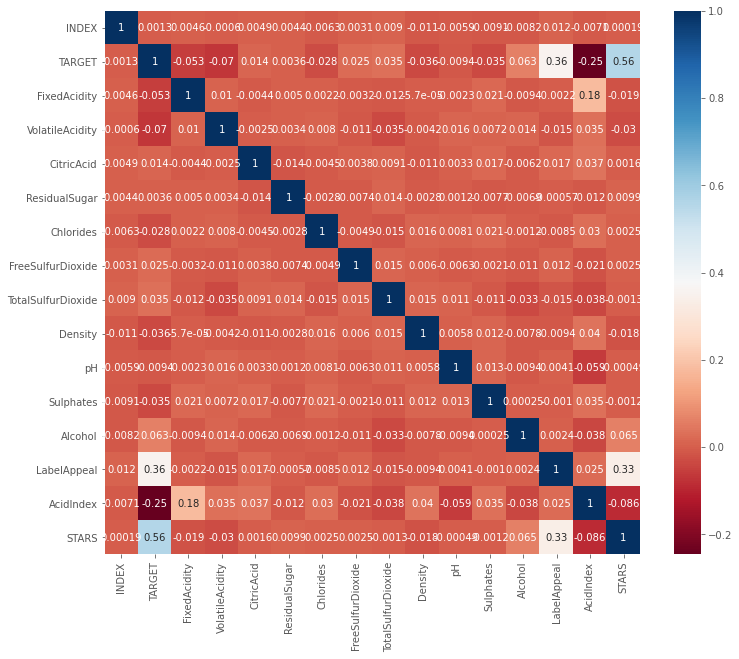

In [14]:
# Heatmap

# Finding the correlation bewteen the Features.
plt.figure(figsize=(12,10))

corr = data.corr()# plot the heatmap
sns.heatmap(corr, cmap="RdBu",xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

# show the heatmap
plt.show()

In [6]:
data.corr()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
INDEX,1.000000,0.001256,0.004581,-0.000601,0.004908,0.004408,-0.006292,0.003138,0.009035,-0.010779,-0.005853,-0.009073,-0.008201,0.011553,-0.007097,0.000194
TARGET,0.001256,1.000000,-0.052984,-0.070195,0.013953,0.003645,-0.028463,0.024503,0.035253,-0.035518,-0.009445,-0.035259,0.063394,0.356500,-0.246049,0.558794
FixedAcidity,0.004581,-0.052984,1.000000,0.010195,-0.004378,0.005040,0.002232,-0.003158,-0.012379,-0.000057,-0.002324,0.020987,-0.009406,-0.002240,0.179916,-0.018505
VolatileAcidity,-0.000601,-0.070195,0.010195,1.000000,-0.002511,0.003443,0.008041,-0.010797,-0.035379,-0.004208,0.016246,0.007220,0.014157,-0.015353,0.035434,-0.030154
CitricAcid,0.004908,0.013953,-0.004378,-0.002511,1.000000,-0.013510,-0.004550,0.003845,0.009138,-0.010854,0.003293,0.017488,-0.006218,0.017322,0.036506,0.001627
ResidualSugar,0.004408,0.003645,0.005040,0.003443,-0.013510,1.000000,-0.002837,-0.007418,0.014476,-0.002794,0.001203,-0.007658,-0.006927,-0.000567,-0.011646,0.009897
Chlorides,-0.006292,-0.028463,0.002232,0.008041,-0.004550,-0.002837,1.000000,-0.004884,-0.015316,0.016483,0.008080,0.021366,-0.001174,-0.008534,0.029846,0.002516
FreeSulfurDioxide,0.003138,0.024503,-0.003158,-0.010797,0.003845,-0.007418,-0.004884,1.000000,0.014710,0.005979,-0.006287,-0.002096,-0.011384,0.011858,-0.021074,0.002465
TotalSulfurDioxide,0.009035,0.035253,-0.012379,-0.035379,0.009138,0.014476,-0.015316,0.014710,1.000000,0.014692,0.010575,-0.010995,-0.033102,-0.015027,-0.037786,-0.001291
Density,-0.010779,-0.035518,-0.000057,-0.004208,-0.010854,-0.002794,0.016483,0.005979,0.014692,1.000000,0.005768,0.012044,-0.007828,-0.009370,0.040413,-0.018284


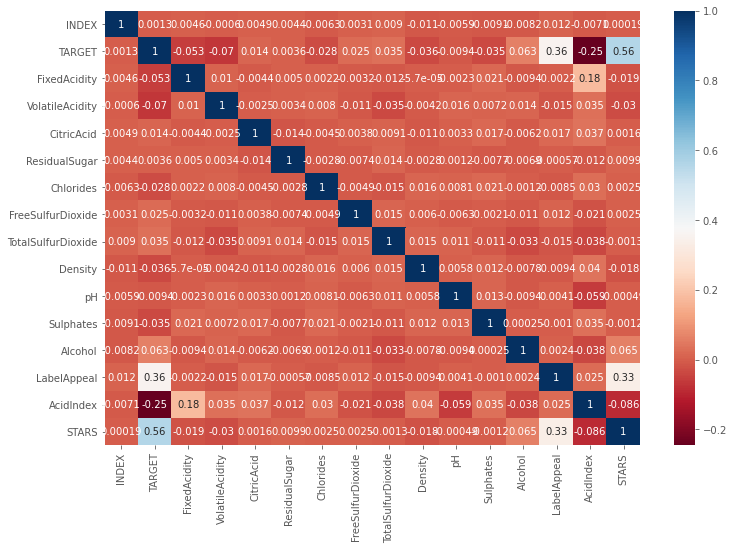

In [13]:

#correlation heatmap 
plt.figure(figsize=(12,8))
ax = sns.heatmap(data.corr(), cmap='RdBu', annot=True)
plt.show()

## 

# Reference: 